<a href="https://colab.research.google.com/github/mmarossi/Turnover/blob/main/modelo_turnover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Turnover_model.xlsx to Turnover_model.xlsx


In [ ]:
nome_do_arquivo="Turnover_model.xlsx"
df=pd.read_excel(nome_do_arquivo)
df.head(3)

,Drt,Sexo,Demitido,Salario_Contratual,Idade,Tcasa,Mer_prom,Dependentes,Avaliacao21,Avaliacao20
0,1001268,0,1,8817.29,60,455,0,0,0.0,0.0
1,901382327,1,1,24416.92,42,77,0,1,0.0,0.0
2,901410407,1,1,8519.75,35,56,0,1,0.0,0.0


In [ ]:
df1 = df.drop(columns = ['Drt'])

In [ ]:
#Criando variáveis independentes e dependentes
y = df1['Demitido']
X = df1
X = df1.drop('Demitido',axis = 1)
X.columns

Index(['Sexo', 'Salario_Contratual', 'Idade', 'Tcasa', 'Mer_prom',
       'Dependentes', 'Avaliacao21', 'Avaliacao20'],
      dtype='object')

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)
#X

In [ ]:
# Separando em dados teste e treinamento 
from sklearn.model_selection import train_test_split 

x_treino, x_teste, y_treino,y_teste  = train_test_split(X, y, test_size = 0.25,random_state = 1)
x_treino

,Sexo,Salario_Contratual,Idade,Tcasa,Mer_prom,Dependentes,Avaliacao21,Avaliacao20
272,1,7288.00,42,2,0,0,0.00,0.00
62,1,13000.00,38,11,0,1,0.00,0.00
185,1,14186.20,41,6,0,1,0.00,0.00
169,1,13163.25,51,17,0,1,2.74,0.00
192,1,9006.21,44,5,0,1,0.00,0.00
...,...,...,...,...,...,...,...,...
203,1,12623.75,53,5,0,1,0.00,0.00
255,1,13214.50,30,6,0,1,0.00,0.00
72,1,12116.22,39,14,0,1,0.00,0.00
235,1,16991.11,45,65,1,1,2.86,2.33


In [ ]:
# Importe o modelo que estamos usando 
from sklearn.ensemble import RandomForestClassifier
# Instancie o modelo com 100 árvores de decisão 
rf = RandomForestClassifier (n_estimators = 100, random_state = 42) 
# Treine o modelo nos dados de treinamento 
rf.fit (x_treino, y_treino);

In [ ]:
y_rf = rf.predict(x_teste)
print (pd.crosstab(y_teste,y_rf, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   0   1  All
Real                
0        55   0   55
1         5  26   31
All      60  26   86


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_teste, y_rf))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        55
           1       1.00      0.84      0.91        31

    accuracy                           0.94        86
   macro avg       0.96      0.92      0.93        86
weighted avg       0.95      0.94      0.94        86



In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
rf.feature_importances_

array([0.01372446, 0.12500899, 0.10944633, 0.36564742, 0.03040164,
       0.05189957, 0.26729166, 0.03657992])

In [ ]:
#Importando as bibliotecas necessárias
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# ajuste do modelo nos dados de treino
xgb = XGBClassifier(learning_rate =0.1,
 n_estimators=100,
 max_depth=6,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1.0,
 seed=27)
xgb.fit(x_treino, y_treino)

XGBClassifier(colsample_bytree=0.8, max_depth=6, nthread=4,
              scale_pos_weight=1.0, seed=27, subsample=0.8)

In [ ]:
#fazendo as predições no dados de teste
preditos_xgb = xgb.predict(x_teste)
print (pd.crosstab(y_teste,preditos_xgb, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   0   1  All
Real                
0        54   1   55
1         4  27   31
All      58  28   86


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_teste, preditos_xgb))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.96      0.87      0.92        31

    accuracy                           0.94        86
   macro avg       0.95      0.93      0.94        86
weighted avg       0.94      0.94      0.94        86



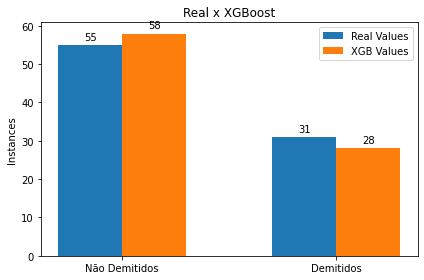

In [ ]:
labels = ['Não Demitidos', 'Demitidos']
count_test = [(y_teste == 0).sum(), (y_teste == 1).sum()]
count_rf = [(preditos_xgb == 0).sum(), (preditos_xgb == 1).sum()]

x = np.arange(len(labels))  
width = 0.3 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, count_test, width, label='Real Values')
rects2 = ax.bar(x + width/2, count_rf, width, label='XGB Values')

ax.set_ylabel('Instances')
ax.set_title('Real x XGBoost')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
fig.tight_layout()

plt.show()

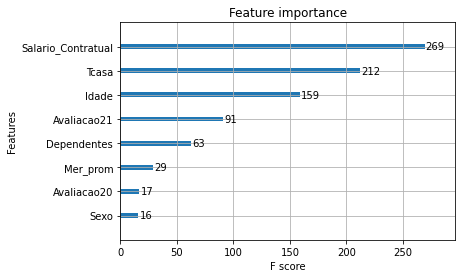

In [ ]:
#Analisando a importância de cada variável
import matplotlib.pyplot as plt
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(6,4))
plot_importance(xgb, ax=ax)

In [ ]:
from sklearn.ensemble import VotingClassifier

# Voting Classifier with soft voting 
voto = VotingClassifier(estimators=[('rf', rf),('xgb',xgb)], voting='soft')
voto = voto.fit(x_treino,y_treino)

In [ ]:
y_predito = voto.predict(x_teste)
print (pd.crosstab(y_teste,y_predito, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   0   1  All
Real                
0        54   1   55
1         4  27   31
All      58  28   86


In [ ]:
print(classification_report(y_teste, y_predito))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.96      0.87      0.92        31

    accuracy                           0.94        86
   macro avg       0.95      0.93      0.94        86
weighted avg       0.94      0.94      0.94        86



In [ ]:
df['proba'] = xgb.predict_proba(X[x_treino.columns])[:,1]
df[['Drt','proba']]

,Drt,proba
0,1001268,0.760034
1,901382327,0.977520
2,901410407,0.969766
3,901433090,0.988504
4,901434466,0.974765
...,...,...
336,901467886,0.100523
337,901467939,0.045495
338,901467941,0.070000
339,901467945,0.009894


In [ ]:
df.head(5)

,Drt,Sexo,Demitido,Salario_Contratual,Idade,Tcasa,Mer_prom,Dependentes,Avaliacao21,Avaliacao20,proba
0,1001268,0,1,8817.29,60,455,0,0,0.0,0.0,0.760034
1,901382327,1,1,24416.92,42,77,0,1,0.0,0.0,0.977520
2,901410407,1,1,8519.75,35,56,0,1,0.0,0.0,0.969766
3,901433090,1,1,11454.94,34,34,0,1,0.0,0.0,0.988504
4,901434466,1,1,21095.37,36,32,0,1,0.0,0.0,0.974765


In [ ]:
df_ativos=df[df['Demitido']==0]

In [ ]:
df_ativos['Rproba'] = np.where(df_ativos['proba'] <= 0.30, 'baixa', np.where((df_ativos['proba'] > 0.30) & (df_ativos['proba'] <= 0.60), 
                'média', 'alta'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
dados= pd.DataFrame(df_ativos)
dados.to_excel('Prob_turnover.xls')

In [ ]:
uploaded = files.upload()

Saving Probabilidade_TI.xlsx to Probabilidade_TI.xlsx


In [ ]:
nome_do_arquivo="Probabilidade_TI.xlsx"
prob=pd.read_excel(nome_do_arquivo)
prob.head(3)

,Drt,Sexo,Demitido,Salario_Contratual,Idade,Tcasa,Mer_prom,Dependentes,Avaliacao21,Avaliacao20,proba,Rproba,Nome,Cargo,Setor,Posic_sal
0,1001522,1,0,9208.44,56,457,1,1,0.00,1.68,0.283699,baixa,DIMAS RUY DE LIMA,ANALISTA APLICACOES TI SR,TI - CENTROS DE SOLUÇÃO,101.1
1,1001546,1,0,11648.56,53,392,1,1,2.44,1.92,0.005839,baixa,PLINIO DE MORAES NAVARRO NETO,CONSULTOR APLICACOES TI I,TI - SUP APLICAÇÕES & TERRITÓRIO,102.3
2,1001569,1,0,16000.00,56,266,0,1,2.04,1.82,0.039514,baixa,NATAL HARUO OGURA,CONSULTOR PROJETOS TI II,TI - ARQUITETURA,101.2


In [ ]:
tab= prob.groupby(["Rproba"])["Nome"].count().sort_values(ascending=False)
tab

Rproba
baixa    209
média      5
alta       1
Name: Nome, dtype: int64

In [ ]:
baixa_prob=prob[prob['Rproba']=='baixa']
gr_baixa= baixa_prob.groupby(["Setor"])["Nome"].count().sort_values(ascending=False)
gr_baixa

Setor
TI - CENTROS DE SOLUÇÃO                47
TECNOLOGIA DA INFORMAÇÃO E-COMMERCE    32
TI - SUP APLICAÇÕES & TERRITÓRIO       31
TI - ARQUITETURA                       22
TI - INFRAESTRUTURA E TELECOM          20
TI - FÁBRICA DE SOFTWARE               19
TI - GOVERNANÇA                        16
TI - SEGURANÇA DA INFORMAÇÃO           14
TI - LOYALTY                            5
DIREÇÃO DE TECNOLOGIA DA INFORMAÇÃO     3
Name: Nome, dtype: int64

In [ ]:
cr_baixa= baixa_prob.groupby(["Cargo"])["Nome"].count().sort_values(ascending=False)
cr_baixa.head(10)

Cargo
ANALISTA APLICACOES TI SR          13
CONSULTOR DESENVOLVIMENTO TI I     13
COORD APLICACOES TI                12
CONSULTOR PROJETOS TI II           10
ANALISTA DESENVOLVIMENTO TI PL     10
CONSULTOR DESENVOLVIMENTO TI II    10
CONSULTOR APLICACOES TI I           8
ANALISTA DESENVOLVIMENTO TI SR      7
SCRUM MASTER II                     7
CONSULTOR PROJETOS TI I             7
Name: Nome, dtype: int64

In [ ]:
media_prob=prob[prob['Rproba']=='média']
gr_media= media_prob.groupby(["Setor"])["Nome"].count().sort_values(ascending=False)
gr_media

Setor
TECNOLOGIA DA INFORMAÇÃO E-COMMERCE    2
TI - SUP APLICAÇÕES & TERRITÓRIO       1
TI - INFRAESTRUTURA E TELECOM          1
TI - FÁBRICA DE SOFTWARE               1
Name: Nome, dtype: int64

In [ ]:
cr_media= media_prob.groupby(["Cargo"])["Nome"].count().sort_values(ascending=False)
cr_media

Cargo
CONSULTOR DESENVOLVIMENTO TI I    2
COORD PROJETOS TI                 1
ANALISTA PROJETOS TI PL           1
ANALISTA INFRAESTRUTURA TI SR     1
Name: Nome, dtype: int64

In [ ]:
alta_prob=prob[prob['Rproba']=='alta']
gr_alta= alta_prob.groupby(["Setor"])["Nome"].count().sort_values(ascending=False)
gr_alta

Setor
TI - INFRAESTRUTURA E TELECOM    1
Name: Nome, dtype: int64

In [ ]:
cr_alta= alta_prob.groupby(["Cargo"])["Nome"].count().sort_values(ascending=False)
cr_alta

Cargo
ANALISTA INFRAESTRUTURA TI SR    1
Name: Nome, dtype: int64

In [ ]:
prob['GR_Idade'] = np.where(prob['Idade'] <= 25, 'até 25 anos', np.where((prob['Idade'] > 25) & (prob['Idade'] <= 35), 
                '26 - 35 anos', np.where((prob['Idade']> 35) & (prob['Idade'] <= 45), '36 - 45 anos', 'mais de 45 anos')))

prob['GR_Tcasa'] = np.where(prob['Tcasa'] <= 3, 'até 3 meses', np.where((prob['Tcasa'] > 3) & (prob['Tcasa'] <= 12), 
                '3 meses a 1 ano', np.where((prob['Tcasa']> 12) & (prob['Tcasa'] < 36), '1 a 2 anos', 
                                            np.where((prob['Tcasa']>= 36) & (prob['Tcasa'] <= 60), '2 a 5 anos', 'mais de 5 anos'))))

prob['GR_posic']= np.where(prob['Posic_sal'] >= 111.5, 'acima de 111%', 
                         np.where(prob['Posic_sal'] <= 87.8, 'abaixo de 88%', 
                                  np.where((prob['Posic_sal'] > 87.8) & (prob['Posic_sal'] < 100.7),'entre 88 e 101%', 'entre 102 e 110%')))


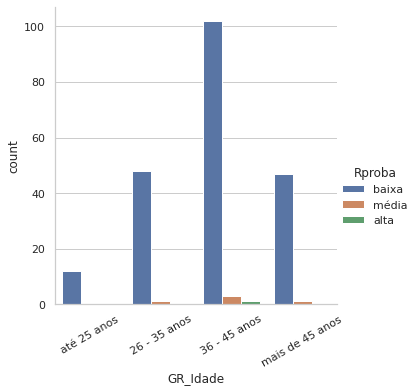

In [ ]:
sns.set_theme(style="whitegrid")
idade_ordem = ['até 25 anos', '26 - 35 anos', '36 - 45 anos', 'mais de 45 anos']
g1=sns.catplot(x='GR_Idade', hue='Rproba', order= idade_ordem, 
            data=prob, kind='count', palette= 'deep')
g1.set_xticklabels(rotation=30)

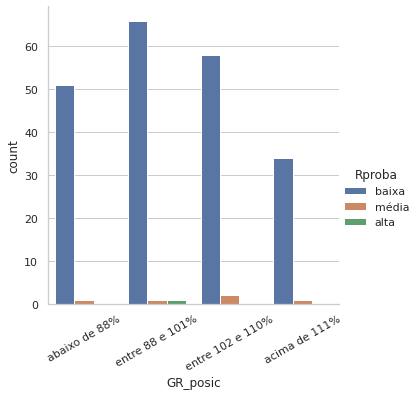

In [ ]:
posic_ordem = ['abaixo de 88%', 'entre 88 e 101%', 'entre 102 e 110%', 'acima de 111%']
g2=sns.catplot(x='GR_posic', hue='Rproba', order= posic_ordem, 
            data=prob, kind='count', palette= 'deep')
g2.set_xticklabels(rotation=30)

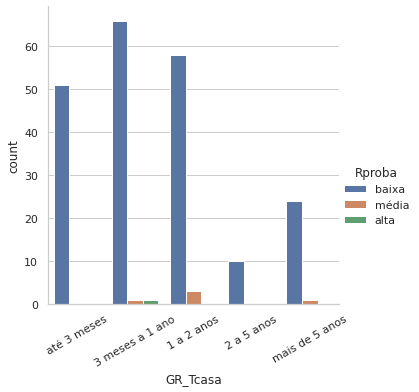

In [ ]:
tcasa_ordem = ['até 3 meses', '3 meses a 1 ano', '1 a 2 anos', '2 a 5 anos','mais de 5 anos']
g3=sns.catplot(x='GR_Tcasa', hue='Rproba', order= tcasa_ordem, 
            data=prob, kind='count', palette= 'deep')
g3.set_xticklabels(rotation=30)